# Daily Challenge

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
import os
import shutil

kaggle_dir = '/root/.kaggle'

# Create the Kaggle directory if it doesn't exist
if not os.path.exists(kaggle_dir):
  os.makedirs(kaggle_dir)

source = '/content/kaggle.json'
destination = '/root/.kaggle/kaggle.json'

# Move the Kaggle token file to the Kaggle directory
if os.path.exists(source):
  shutil.move(source, destination)

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# https://www.kaggle.com/datasets/unsdsn/world-happiness

!kaggle datasets download -d unsdsn/world-happiness

Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 2.78MB/s]


In [ ]:
!unzip /content/world-happiness.zip

Archive:  /content/world-happiness.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


In [ ]:
import pandas as pd

df = pd.read_csv('/content/2019.csv')

df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
# 4 Data Preprocessing

# Missing values
print(f"There is {df.isnull().sum().sum()} missing values in this dataset.")

There is 0 missing values in this dataset.


In [ ]:
df.nunique()

,0
Overall rank,156
Country or region,156
Score,155
GDP per capita,146
Social support,145
Healthy life expectancy,119
Freedom to make life choices,130
Generosity,118
Perceptions of corruption,113


In [ ]:
df.dtypes

,0
Overall rank,int64
Country or region,object
Score,float64
GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64


The dataset has no missing values, and all the columns are in the correct data type.

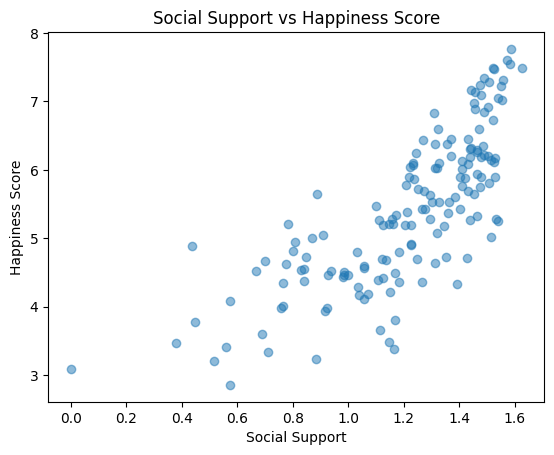

In [ ]:
#  Social Support and Happiness

import matplotlib.pyplot as plt

x = df['Social support']
y = df['Score']

plt.scatter(x, y, alpha = 0.5)

plt.title('Social Support vs Happiness Score')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')

plt.show()

There seems to be a positive correlation between the two variables: the more a country has a protective social system, the happier its population tends to be.

In [ ]:
# There are too many countries in the dataset, which would  make the graph too noisy. To make it clearer, let's group the countries by continent

# Create a mapping of countries to continents
continent_map = {
    'Finland': 'Europe', 'Denmark': 'Europe', 'Norway': 'Europe', 'Iceland': 'Europe', 'Netherlands': 'Europe',
    'Switzerland': 'Europe', 'Sweden': 'Europe', 'New Zealand': 'Oceania', 'Canada': 'North America', 'Austria': 'Europe',
    'Australia': 'Oceania', 'Costa Rica': 'North America', 'Israel': 'Asia', 'Luxembourg': 'Europe', 'United Kingdom': 'Europe',
    'Ireland': 'Europe', 'Germany': 'Europe', 'Belgium': 'Europe', 'United States': 'North America', 'Czech Republic': 'Europe',
    'United Arab Emirates': 'Asia', 'Malta': 'Europe', 'Mexico': 'North America', 'France': 'Europe', 'Taiwan': 'Asia',
    'Chile': 'South America', 'Guatemala': 'North America', 'Saudi Arabia': 'Asia', 'Qatar': 'Asia', 'Spain': 'Europe',
    'Panama': 'North America', 'Brazil': 'South America', 'Uruguay': 'South America', 'Singapore': 'Asia', 'El Salvador': 'North America',
    'Italy': 'Europe', 'Bahrain': 'Asia', 'Slovakia': 'Europe', 'Trinidad & Tobago': 'North America', 'Poland': 'Europe',
    'Uzbekistan': 'Asia', 'Lithuania': 'Europe', 'Colombia': 'South America', 'Slovenia': 'Europe', 'Nicaragua': 'North America',
    'Argentina': 'South America', 'Romania': 'Europe', 'Cyprus': 'Europe', 'Ecuador': 'South America', 'Kuwait': 'Asia',
    'Thailand': 'Asia', 'Latvia': 'Europe', 'South Korea': 'Asia', 'Estonia': 'Europe', 'Jamaica': 'North America',
    'Mauritius': 'Africa', 'Japan': 'Asia', 'Honduras': 'North America', 'Kazakhstan': 'Asia', 'Bolivia': 'South America',
    'Hungary': 'Europe', 'Paraguay': 'South America', 'Peru': 'South America', 'Portugal': 'Europe', 'Russia': 'Europe',
    'Belarus': 'Europe', 'Serbia': 'Europe', 'Philippines': 'Asia', 'Moldova': 'Europe', 'Libya': 'Africa',
    'Montenegro': 'Europe', 'Tajikistan': 'Asia', 'Croatia': 'Europe', 'Hong Kong': 'Asia', 'Dominican Republic': 'North America',
    'Bosnia and Herzegovina': 'Europe', 'Turkey': 'Asia', 'Malaysia': 'Asia', 'Venezuela': 'South America', 'Nigeria': 'Africa',
    'Macedonia': 'Europe', 'Vietnam': 'Asia', 'Indonesia': 'Asia', 'Kyrgyzstan': 'Asia', 'Bhutan': 'Asia',
    'China': 'Asia', 'Pakistan': 'Asia', 'Jordan': 'Asia', 'Morocco': 'Africa', 'Azerbaijan': 'Asia', 'Lebanon': 'Asia',
    'Albania': 'Europe', 'Bangladesh': 'Asia', 'Greece': 'Europe', 'Tanzania': 'Africa', 'Iraq': 'Asia', 'Congo (Brazzaville)': 'Africa',
    'Mali': 'Africa', 'Nepal': 'Asia', 'Palestinian Territories': 'Asia', 'Gabon': 'Africa', 'South Africa': 'Africa',
    'Iran': 'Asia', 'Ghana': 'Africa', 'Senegal': 'Africa', 'Cambodia': 'Asia', 'Tunisia': 'Africa', 'Kenya': 'Africa',
    'Mauritania': 'Africa', 'Mozambique': 'Africa', 'Cameroon': 'Africa', 'Bulgaria': 'Europe', 'Egypt': 'Africa',
    'Sierra Leone': 'Africa', 'Armenia': 'Asia', 'Myanmar': 'Asia', 'Georgia': 'Europe', 'Chad': 'Africa', 'Sri Lanka': 'Asia',
    'Congo (Kinshasa)': 'Africa', 'India': 'Asia', 'Namibia': 'Africa', 'Central African Republic': 'Africa',
    'Madagascar': 'Africa', 'Lesotho': 'Africa', 'Malawi': 'Africa', 'Botswana': 'Africa', 'Rwanda': 'Africa',
    'Zimbabwe': 'Africa', 'Afghanistan': 'Asia', 'Benin': 'Africa', 'Togo': 'Africa', 'Syria': 'Asia', 'Burundi': 'Africa',
    'Haiti': 'North America', 'Yemen': 'Asia', 'Tanzania': 'Africa', 'Liberia': 'Africa'
}

df['Continent'] = df['Country or region'].map(continent_map)

df.groupby(by = ['Continent'])['Score'].mean().sort_values(ascending = False)



,Score
Continent,
Oceania,7.267500
Europe,6.303103
North America,6.154692
South America,5.920200
Asia,5.265325
Africa,4.370781


In [ ]:
df[df.Continent.isnull()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
45,46,Kosovo,6.100,0.882,1.232,0.758,0.489,0.262,0.006,NaN
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162,NaN
82,83,Mongolia,5.285,0.948,1.531,0.667,0.317,0.235,0.038,NaN
83,84,North Macedonia,5.274,0.983,1.294,0.838,0.345,0.185,0.034,NaN
86,87,Turkmenistan,5.247,1.052,1.538,0.657,0.394,0.244,0.028,NaN
87,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,NaN
98,99,Ivory Coast,4.944,0.569,0.808,0.232,0.352,0.154,0.090,NaN
104,105,Laos,4.796,0.764,1.030,0.551,0.547,0.266,0.164,NaN
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270,NaN
113,114,Niger,4.628,0.138,0.774,0.366,0.318,0.188,0.102,NaN


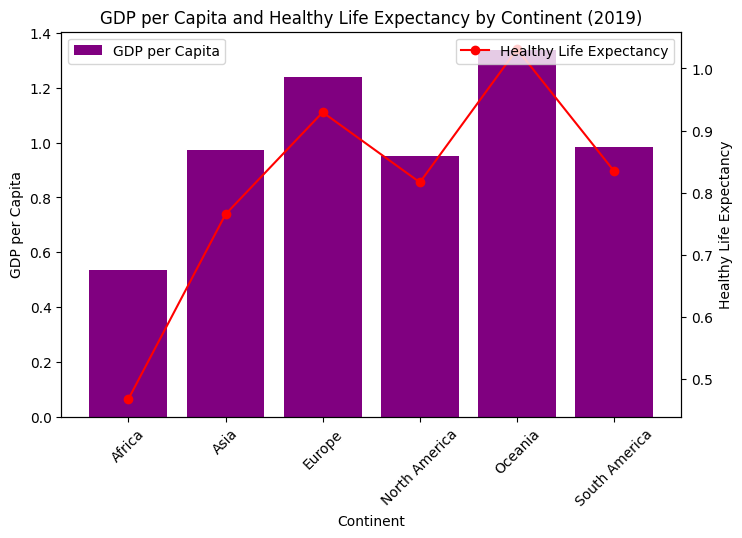

In [ ]:
# Group by continent and get average GDP and life expectancy
continent_grouped = df.groupby('Continent')[['GDP per capita', 'Healthy life expectancy']].mean().reset_index()

# Create figure and axis with set size
fig, ax1 = plt.subplots(figsize=(8, 5))

#Bar plot for GDP per capita
ax1.bar(continent_grouped['Continent'], continent_grouped['GDP per capita'], color='purple', label='GDP per Capita')
ax1.set_xlabel('Continent')
ax1.set_ylabel('GDP per Capita')
ax1.tick_params(axis='x', rotation=45)

# 2nd axe for healthy life expectancy
ax2 = ax1.twinx()
ax2.plot(continent_grouped['Continent'], continent_grouped['Healthy life expectancy'], color='red', marker='o', label='Healthy Life Expectancy')
ax2.set_ylabel('Healthy Life Expectancy')

# Customization
plt.title('GDP per Capita and Healthy Life Expectancy by Continent (2019)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# Data Visualization with Seaborn #1

## Challenge (Data Visualization with Seaborn #1)
You are a data analyst working with a dataset that contains information on customers’ age and their annual expenditure in a shopping mall. The dataset is loaded into a pandas DataFrame named customer_data.

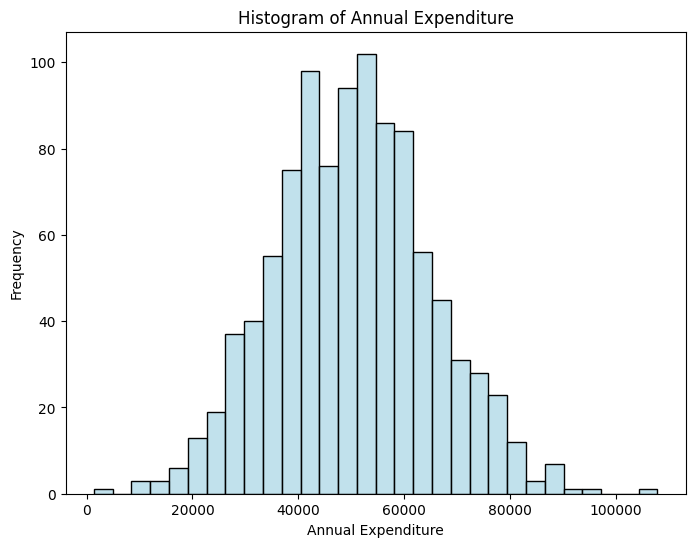

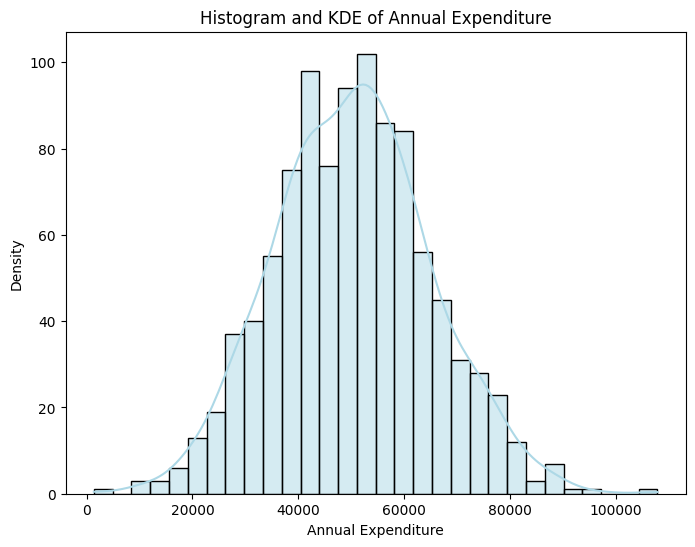

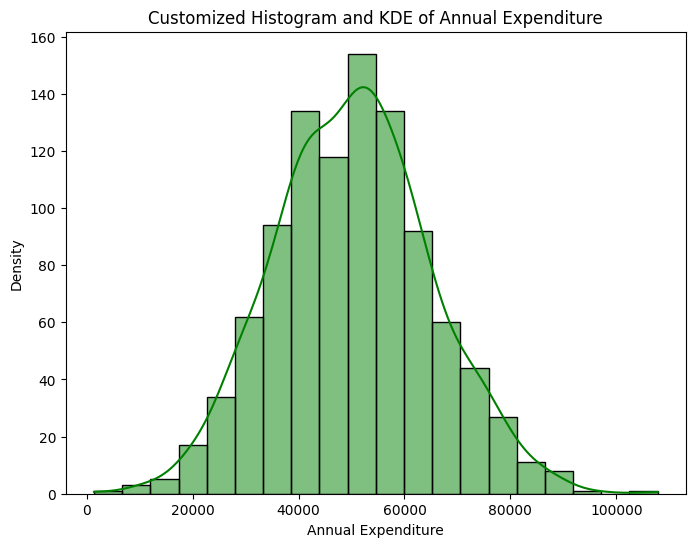

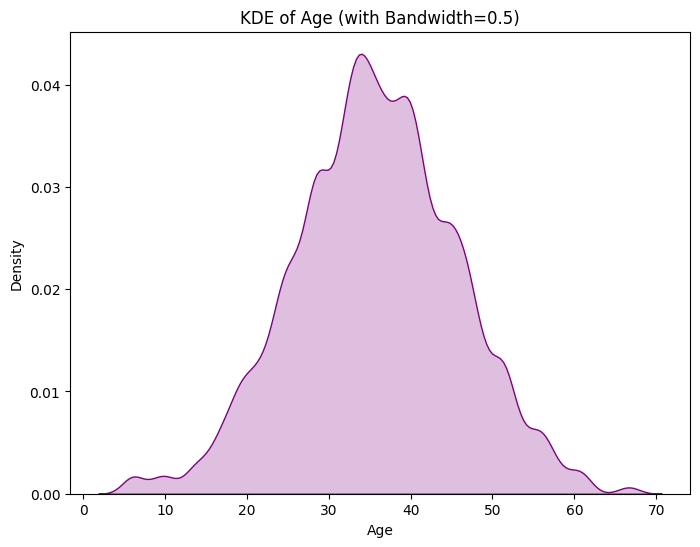

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Plot histogram of 'Annual Expenditure'
plt.figure(figsize=(8,6))
sns.histplot(customer_data['Annual Expenditure'], bins=30, kde=False, color='lightblue')
plt.title('Histogram of Annual Expenditure')
plt.xlabel('Annual Expenditure')
plt.ylabel('Frequency')
plt.show()

# Step 2: Add KDE plot to the histogram
plt.figure(figsize=(8,6))
sns.histplot(customer_data['Annual Expenditure'], bins=30, kde=True, color='lightblue')
plt.title('Histogram and KDE of Annual Expenditure')
plt.xlabel('Annual Expenditure')
plt.ylabel('Density')
plt.show()

# Step 3: Customize the histogram (bins, color, etc.)
plt.figure(figsize=(8,6))
sns.histplot(customer_data['Annual Expenditure'], bins=20, kde=True, color='green')
plt.title('Customized Histogram and KDE of Annual Expenditure')
plt.xlabel('Annual Expenditure')
plt.ylabel('Density')
plt.show()

# Step 4: Create a KDE plot of 'Age' with bandwidth adjustment
plt.figure(figsize=(8,6))
sns.kdeplot(customer_data['Age'], bw_adjust=0.5, fill=True, color='purple')
plt.title('KDE of Age (with Bandwidth=0.5)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


## Back to lesson (Data Visualization with Seaborn #1)

### Joint Plot

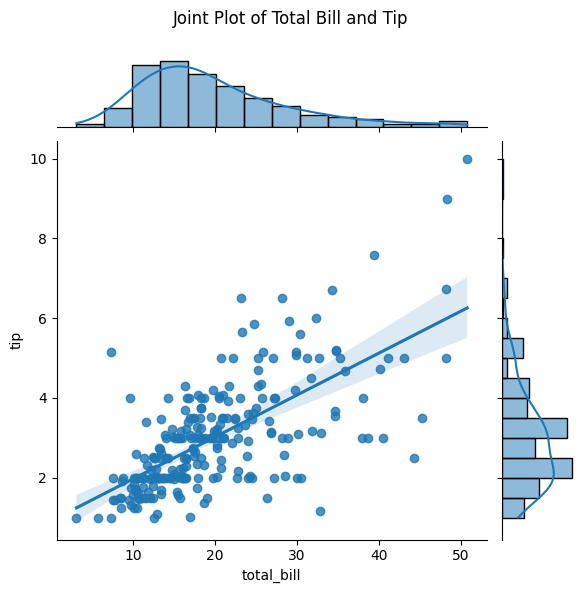

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loading example dataset
data = sns.load_dataset('tips')

# Creating the joint plot
sns.jointplot(x='total_bill', y='tip', data=data, kind='reg')

# Adding a title
plt.subplots_adjust(top=0.9)
plt.suptitle('Joint Plot of Total Bill and Tip')

# Displaying the plot
plt.show()

# Data Visualization with Seaborn #2

## 🚀 Challenge: Analyzing Sales Data with Seaborn and Pandas

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sales_data.csv')

df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [ ]:
df.isnull().sum().sum()

4

In [ ]:
# Convert 'date' variable to datetime format
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

,0
date,datetime64[ns]
product,object
category,object
price,float64
quantity,float64
revenue,float64


In [ ]:
df['category'].value_counts()

,count
category,
Electronics,130
Clothing,120
Accessories,70
Bags,23
Shoes,23
Clohting,1
Bgas,1
Shoeses,1


In [ ]:
df['category'] = df['category'].astype('category')

In [ ]:
df.dtypes

,0
date,datetime64[ns]
product,object
category,category
price,float64
quantity,float64
revenue,float64


In [ ]:
# Missing values

df.isnull().sum()

,0
date,0
product,0
category,0
price,2
quantity,1
revenue,1


In [ ]:
df[df['price'].isnull()]

,date,product,category,price,quantity,revenue
193,2022-07-11,Watch,Accessories,NaN,15.0,2250.0
320,2022-11-13,Wallet,Accessories,NaN,35.0,1050.0


In [ ]:
df.loc[[193, 320]]

,date,product,category,price,quantity,revenue
193,2022-07-11,Watch,Accessories,NaN,15.0,2250.0
320,2022-11-13,Wallet,Accessories,NaN,35.0,1050.0


In [ ]:
df.sample(50)

,date,product,category,price,quantity,revenue
196,2022-07-14,Sneakers,Shoes,80.0,8.0,640.0
33,2022-02-01,T-Shirt,Clothing,20.0,35.0,700.0
278,2022-10-03,Speaker,Electronics,80.0,25.0,2000.0
189,2022-07-07,Smartphone,Electronics,600.0,7.0,4200.0
172,2022-06-20,T-Shirt,Clothing,20.0,20.0,400.0
8,2022-01-07,Coat,Clothing,100.0,10.0,1000.0
351,2022-12-14,Smartwatch,Accessories,200.0,5.0,1000.0
228,2022-08-15,Smartwatch,Accessories,200.0,5.0,1000.0
20,2022-01-19,Speaker,Electronics,80.0,20.0,1600.0
68,2022-03-08,Backpack,Bags,50.0,15.0,750.0


In [ ]:
df.describe()

,date,price,quantity,revenue
count,369,367.000000,368.000000,368.000000
mean,2022-07-01 15:05:21.951219456,211.226158,14.565217,2060.679348
min,2022-01-01 00:00:00,20.000000,3.000000,300.000000
25%,2022-04-01 00:00:00,50.000000,8.000000,800.000000
50%,2022-07-02 00:00:00,100.000000,12.000000,1200.000000
75%,2022-10-01 00:00:00,300.000000,20.000000,2400.000000
max,2022-12-31 00:00:00,1200.000000,50.000000,7200.000000
std,NaN,227.335170,8.595740,1910.930790


In [ ]:
# Replace the missing 'quantity' with the result of 'revenue' divided by 'price'
df['quantity'] = df.apply(
    lambda row: row['revenue'] / row['price'] if pd.isnull(row['quantity']) else row['quantity'], axis=1
)

# Replace the missing 'price' with the result of 'revenue' divided by 'quantity'
df['price'] = df.apply(
    lambda row: row['revenue'] / row['quantity'] if pd.isnull(row['price']) else row['price'], axis=1
)

# Replace the missing 'revenue' with the result of 'price' multiplied by
# 'quantity'
df['revenue'] = df.apply(
    lambda row: row['price'] * row['quantity'] if pd.isnull(row['revenue']) else row['revenue'], axis=1
)


df.loc[[193, 320]]

,date,product,category,price,quantity,revenue
193,2022-07-11,Watch,Accessories,150.0,15.0,2250.0
320,2022-11-13,Wallet,Accessories,30.0,35.0,1050.0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# Create a line plot to show the sales trend

sales_trends = df.groupby('date')['revenue'].sum()

sales_trends

,revenue
date,
2022-01-01,12000.0
2022-01-02,1000.0
2022-01-03,2000.0
2022-01-04,500.0
2022-01-05,1500.0
...,...
2022-12-27,750.0
2022-12-28,500.0
2022-12-29,1000.0


In [ ]:
# Create a line plot to show the sales trend

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_trends.index, y=sales_trends.values)

# Customize
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

plt.show()

NameError: name 'sales_trends' is not defined

<Figure size 1000x600 with 0 Axes>

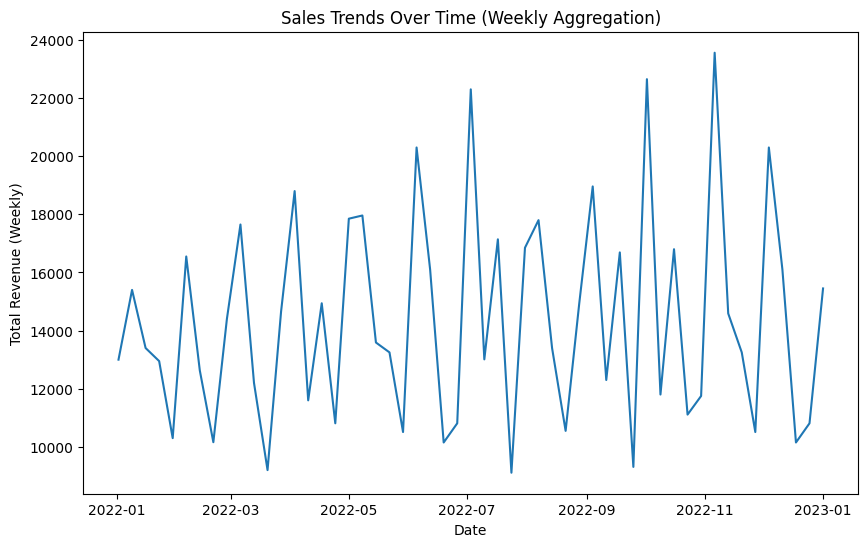

In [ ]:
# Aggregate revenue by week
sales_trends_weekly = df.resample('W', on='date')['revenue'].sum()

# Plot the weekly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_trends_weekly.index, y=sales_trends_weekly.values)

# Customization
plt.title('Sales Trends Over Time (Weekly Aggregation)')
plt.xlabel('Date')
plt.ylabel('Total Revenue (Weekly)')

plt.show()

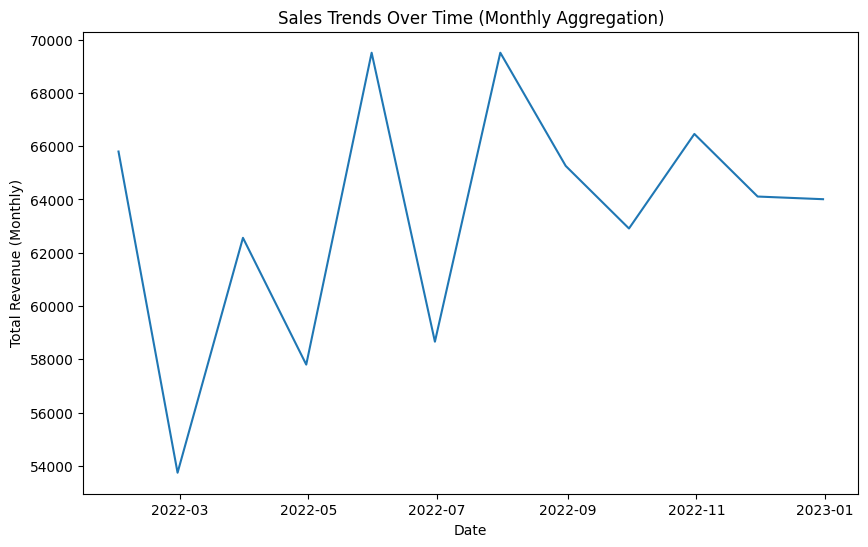

In [ ]:
# Aggregate revenue by month
sales_trends_monthly = df.resample('M', on='date')['revenue'].sum()

# Plot the monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_trends_monthly.index, y=sales_trends_monthly.values)

# Customization
plt.title('Sales Trends Over Time (Monthly Aggregation)')
plt.xlabel('Date')
plt.ylabel('Total Revenue (Monthly)')

plt.show()

<ipython-input-48-1a5b1c694519>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_revenue = df.groupby('category')['revenue'].sum().reset_index()


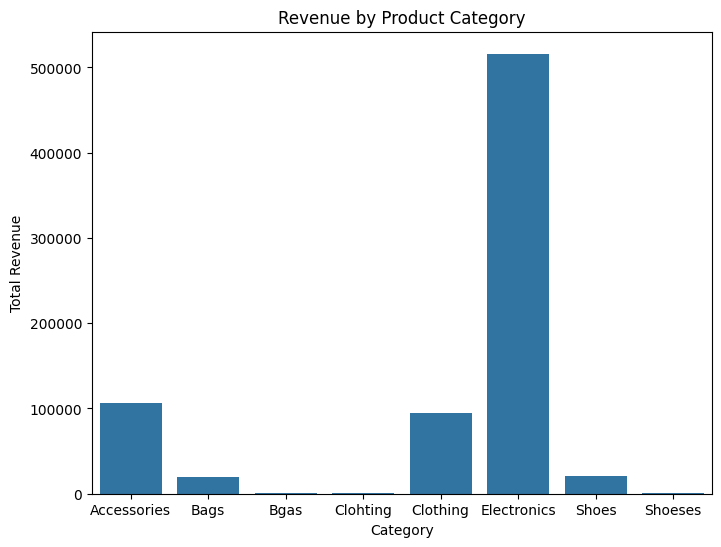

In [ ]:
# Step 4: Product Category Comparison
# Group by category and sum the revenue
category_revenue = df.groupby('category')['revenue'].sum().reset_index()

# Create a bar plot to compare revenue across different categories
plt.figure(figsize=(8, 6))
sns.barplot(x='category', y='revenue', data=category_revenue)

# Customization
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')

plt.show()

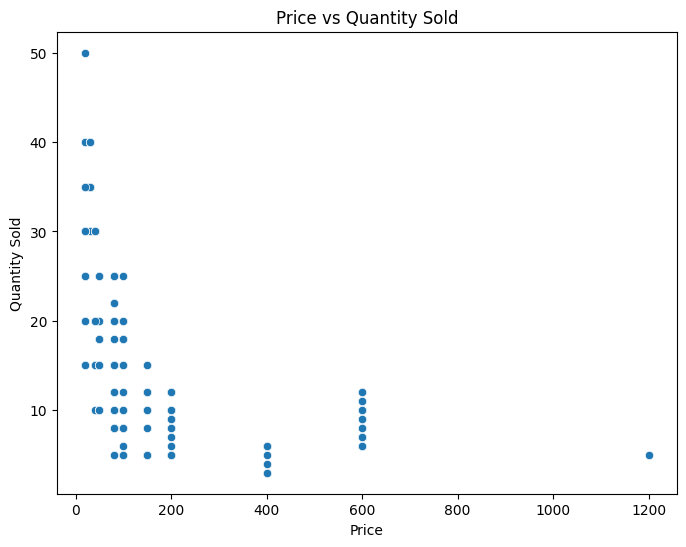

In [ ]:
# Step 5: Relationship Between Price and Quantity Sold

# Create a scatter plot to explore the relationship between price and quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='quantity', data=df)

# Customization
plt.title('Price vs Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')

plt.show()


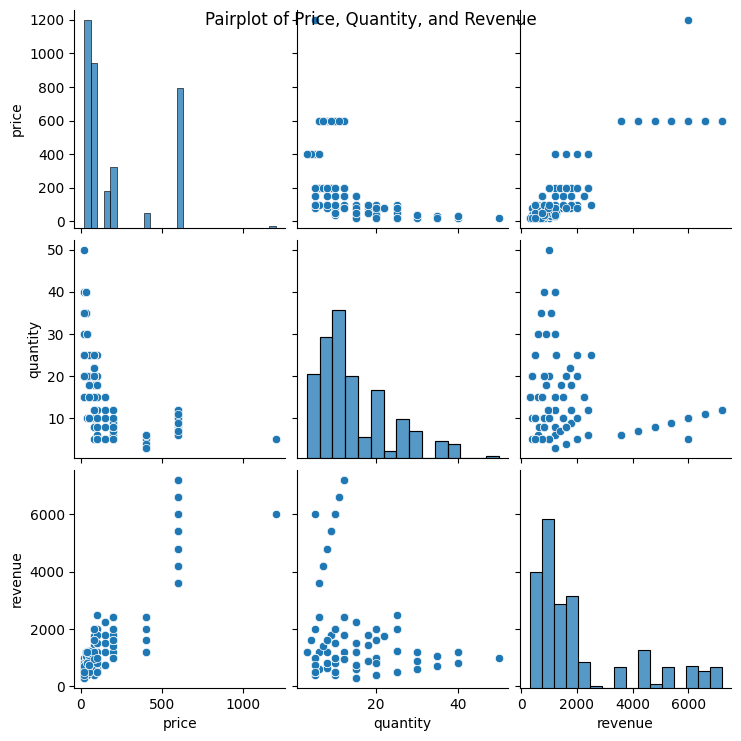

In [ ]:
# Step 6: Product Performance Analysis

# Use a pairplot to investigate relationships involving price, quantity, and revenue
sns.pairplot(df[['price', 'quantity', 'revenue']])
plt.suptitle('Pairplot of Price, Quantity, and Revenue')

plt.show()


<ipython-input-53-0c00ac57e2ea>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_price_avg = df.groupby('category')['price'].mean().reset_index()


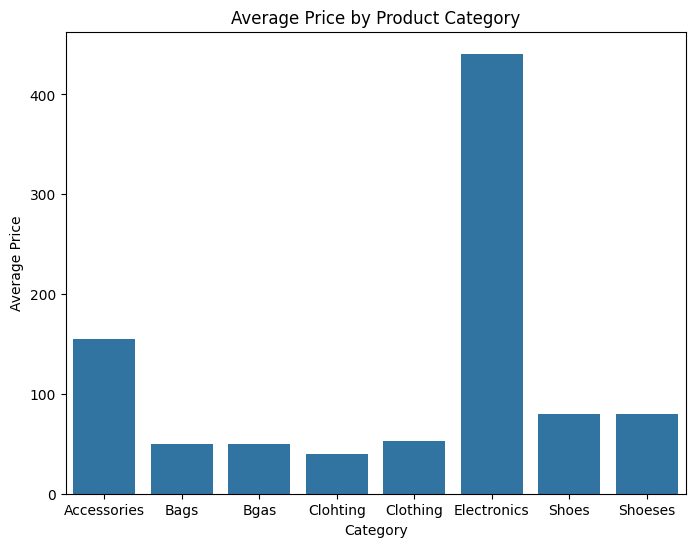

In [ ]:
# Step 7: Aggregated Category Insights
# Group by category and calculate the average price
category_price_avg = df.groupby('category')['price'].mean().reset_index()

# Create a bar plot to show the average price per category
plt.figure(figsize=(8, 6))
sns.barplot(x='category', y='price', data=category_price_avg)

# Customization
plt.title('Average Price by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Price')

plt.show()